Computation of model of resistor

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

In [2]:
#curve_shift = 0
curve_shift = 18

resistance = [32.68, 31.06, 29.53, 28.08, 26.71, 25.41, 24.19, 23.03, 21.93, 20.9, 19.91, 18.98, 18.1, 17.26, 16.47, 15.72, 15, 14.33, 13.68, 13.07, 12.49, 11.94, 11.42, 10.92, 10.45, 10,
9.572, 9.164, 8.776, 8.407, 8.055, 7.72, 7.401, 7.097, 6.806, 6.53, 6.266, 6.014, 5.773, 5.544, 5.325, 5.115, 4.915, 4.724, 4.542, 4.367, 4.2, 4.041, 3.888, 3.742, 3.602, 3.468, 3.339, 3.217, 3.099, 2.986,
2.878, 2.774, 2.675, 2.58, 2.488, 2.401, 2.317, 2.236, 2.158, 2.084, 2.012, 1.944, 1.878, 1.814, 1.753, 1.695, 1.639, 1.584, 1.532, 1.482, 1.434, 1.387, 1.343, 1.3, 1.258, 1.218, 1.18, 1.143, 1.107, 1.073, 1.039, 1.007, 0.9766, 0.9468, 0.9181, 0.8904,
0.8637, 0.8379, 0.813, 0.789, 0.7658, 0.7434, 0.7217, 0.7008, 0.6806, 0.661, 0.6421, 0.6239, 0.6062, 0.5892, 0.5727, 0.5567, 
              0.5413, 0.5263, 0.5119, 0.4979, 0.4843, 0.4712, 0.4585, 0.4462, 0.4343, 0.4227, 0.4115, 0.4007, 0.3902, 0.38,
              0.3702, 0.3606, 0.3513, 0.3423, 0.3336, 0.3252, 0.3169, 0.309, 0.3013, 0.2938, 0.2865, 0.2794, 0.2725, 0.2659, 
              0.2594, 0.2531, 0.247, 0.2411]

temp = np.arange(curve_shift, len(resistance))

resistance = resistance[:-curve_shift]

In [3]:
for i_res in range(len(resistance)):
    resistance[i_res] *= 1000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


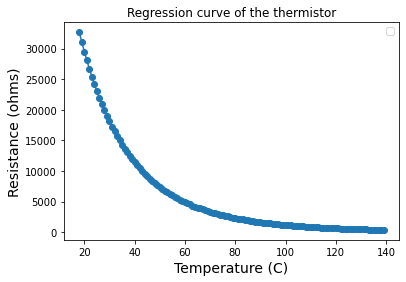

In [8]:
fig, ax =plt.subplots(1,1)
fs = 14
ax.plot(temp, resistance, marker='o')
ax.set_title("Regression curve of the thermistor")
ax.set_ylabel('Resistance (ohms)', fontsize=fs)
ax.set_xlabel('Temperature (C)', fontsize=fs)
ax.legend()

plt.show()

[1.00000000e+00 1.00000000e+00 6.05446395e+03]


C:\Users\benoi\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


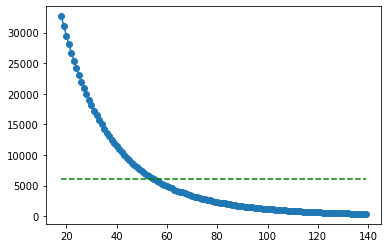

In [9]:
def temp_to_resistor(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(temp_to_resistor, temp, resistance)#, bounds=(0, [3., 1., 0.5]))
print(popt)
plt.plot(temp, resistance, marker='o')
plt.plot(temp, temp_to_resistor(temp, *popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.show()

In [10]:
def resistor_to_temp(y, a, b, c):
    return -np.log((y - c) / a) / b

In [11]:
# print(resistor_to_temp(5537, 31.65087152, 0.04736822, 0.43440881))
print(resistor_to_temp(5537, 1.0, 1.0, 6054.46395))

nan


C:\Users\benoi\AppData\Local\Temp\ipykernel_15540\2966418108.py:2: RuntimeWarning: invalid value encountered in log
  return -np.log((y - c) / a) / b


In [12]:
# print(temp_to_resistor(10, 31.65087152, 0.04736822, 0.43440881))
print(temp_to_resistor(22, 1.0, 1.0, 6054.46395))

6054.4639500002795


Section data analysis

In [13]:
import numpy as np
import matplotlib.pyplot as plt
data = np.load("./data.npy", allow_pickle=True)
total_time = data['temperature']
# print(data)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

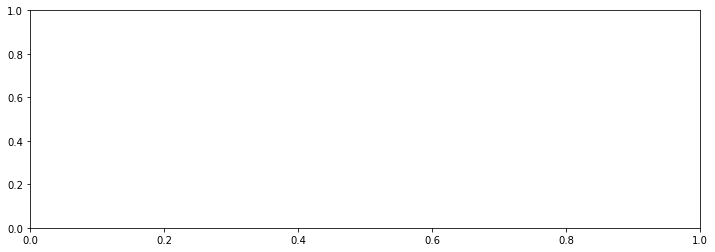

In [6]:
fig, ax = plt.subplots(1,1)
fig.set_figwidth(12)

for sensor in range(0,3):
    ax.plot(, data['temperature'][:, sensor], label="sensor # " + str(sensor))
    
ax.set_title("Temperature")
ax.legend(loc='upper right')
ax.set_xlabel("time (s)")
ax.set_ylabel("Temperature (C)")
plt.show